In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [16]:
def print_evaluate(true, predicted):  
    
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [17]:
data = pd.read_csv("features_means_regression.csv")

In [18]:
data.head()

,bbox_area,solidity,centroid-0,centroid-1,orientation,convex_area,area,filled_area,eccentricity,extent,...,feret_diameter_max,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,perimeter_crofton,minor_axis_length,label,target
0,7276,0.747307,100.973613,100.483020,-1.269781,5477,4093,4093,0.898864,0.562534,...,116.777566,891.221126,219.481758,219.481758,252.377022,354.735065,338.991447,54.293890,156,1500
1,10712,0.940264,100.188944,100.431656,-0.200147,7734,7272,7272,0.370543,0.678865,...,107.703296,569.414746,17.547318,17.547318,652.353464,357.806133,341.903002,95.150832,137,1474
2,9373,0.649843,100.981576,100.862812,-1.036508,5429,3528,3528,0.749006,0.376400,...,116.846053,589.342857,169.568287,169.568287,403.092915,408.031529,389.519664,69.600086,91,1081
3,9030,0.860550,100.753751,100.654016,1.224445,6583,5665,5665,0.714081,0.627353,...,111.664677,696.100242,-120.414537,-120.414537,405.905999,346.776695,331.446440,76.152324,192,1560
4,1764,0.794444,100.654346,100.613387,-0.012331,1260,1001,1001,0.982040,0.567460,...,84.380092,17.062318,5.676092,5.676092,477.277126,191.982756,184.692583,16.488698,123,1793


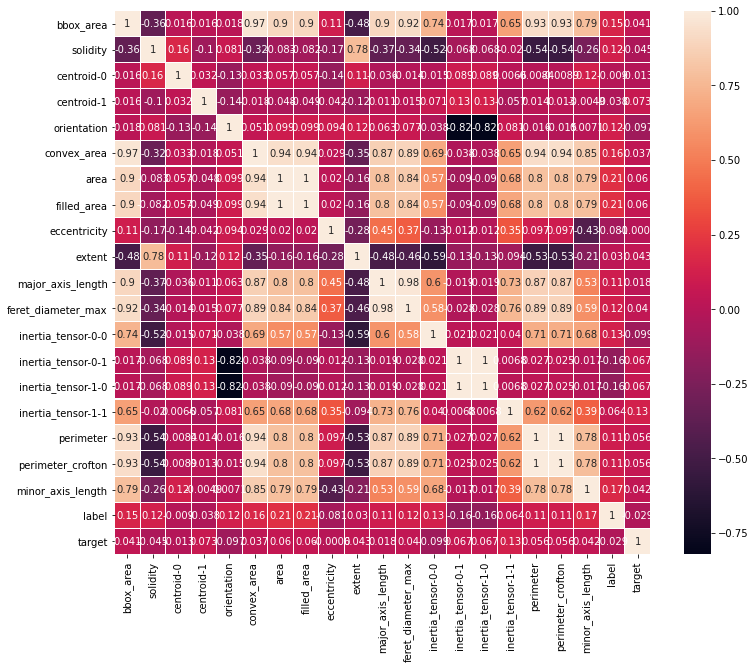

In [19]:
corrmat = data.corr(method='spearman')
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, linewidths=0.1, annot=True);

In [20]:
data.columns

Index(['bbox_area', 'solidity', 'centroid-0', 'centroid-1', 'orientation',
       'convex_area', 'area', 'filled_area', 'eccentricity', 'extent',
       'major_axis_length', 'feret_diameter_max', 'inertia_tensor-0-0',
       'inertia_tensor-0-1', 'inertia_tensor-1-0', 'inertia_tensor-1-1',
       'perimeter', 'perimeter_crofton', 'minor_axis_length', 'label',
       'target'],
      dtype='object')

In [21]:
X = data[data.columns[:-2]]
y = data.target.values
ids = data.label.values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=42)

In [62]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [63]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

In [64]:
print('Métricas de Teste')
print_evaluate(y_test, test_pred)
print('-' * 30)
print('Métricas de Treino')
print_evaluate(y_train, train_pred)

Métricas de Teste
MAE: 256.0292444444445
MSE: 104801.41092137777
RMSE: 323.73046029278396
R2 Square 0.01902339072246584
------------------------------
Métricas de Treino
MAE: 92.1915619047619
MSE: 14472.329937847617
RMSE: 120.30099724377855
R2 Square 0.8569089411731821


<BarContainer object of 19 artists>

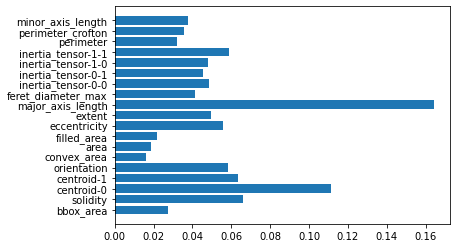

In [60]:
plt.barh(X.columns, rf_reg.feature_importances_)